In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch
import torch.nn.functional as F
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, MaxPooling2D, Dropout
from tensorflow.keras.applications import ResNet50, DenseNet121
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input, Conv2D, BatchNormalization, Activation, Concatenate, AveragePooling2D
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, accuracy_score, ConfusionMatrixDisplay, recall_score
from sklearn.utils.class_weight import compute_class_weight
import shutil
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report


In [2]:
data_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DATA'

# Data Distrubition

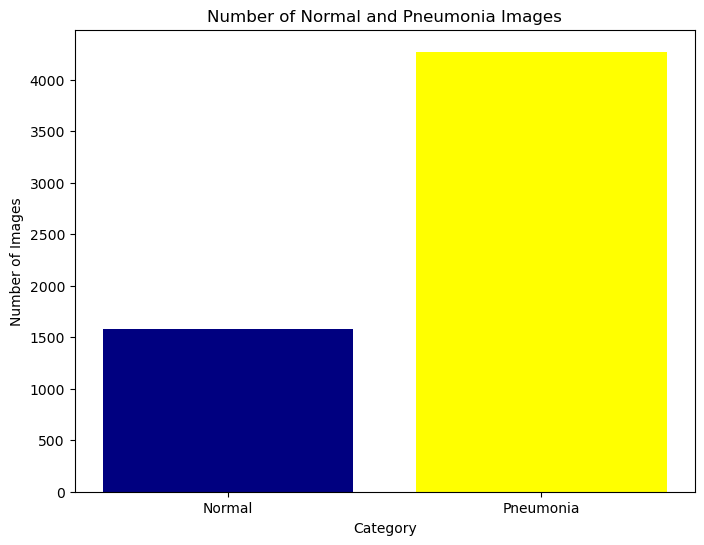

In [12]:
import os
import matplotlib.pyplot as plt

data_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DATA'
normal_dir = os.path.join(data_dir, 'NORMAL')
pneumonia_dir = os.path.join(data_dir, 'PNEUMONIA')

normal_count = len(os.listdir(normal_dir))
pneumonia_count = len(os.listdir(pneumonia_dir))

labels = ['Normal', 'Pneumonia']
counts = [normal_count, pneumonia_count]
total=counts+labels
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color=['navy', 'yellow'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Normal and Pneumonia Images')
plt.show()

In [13]:
total_count = normal_count + pneumonia_count
normal_percentage = (normal_count / total_count) * 100 if total_count > 0 else 0
pneumonia_percentage = (pneumonia_count / total_count) * 100 if total_count > 0 else 0
print(f"Normal: {normal_count} images, {normal_percentage:.2f}%")
print(f"Pneumonia: {pneumonia_count} images, {pneumonia_percentage:.2f}%")


Normal: 1583 images, 27.03%
Pneumonia: 4273 images, 72.97%


In [192]:
def load_data(data_dir_lenet):
    images = []
    labels = []
    classes = ['NORMAL', 'PNEUMONIA']
    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(32, 32))
            img = tf.keras.preprocessing.image.img_to_array(img)
            img = img / 255.0
            images.append(img)
            labels.append(classes.index(label))
    return np.array(images), np.array(labels)

In [193]:
images_lenet, labels_lenet = load_data(data_dir)

# Splitting data as test and train

In [194]:
X_train_lenet, X_test_lenet, y_train_lenet, y_test_lenet = train_test_split(images_lenet, labels_lenet, test_size=0.2, random_state=35)

In [195]:
X_train_lenet, X_val_lenet, y_train_lenet, y_val_lenet = train_test_split(X_train_lenet, y_train_lenet, test_size=0.2, random_state=35)

In [196]:
train_datagen_lenet = ImageDataGenerator()
val_test_datagen_lenet = ImageDataGenerator()

In [197]:
train_generator_lenet = train_datagen_lenet.flow(X_train_lenet, y_train_lenet, batch_size=32)
validation_generator_lenet = val_test_datagen_lenet.flow(X_val_lenet, y_val_lenet, batch_size=32)
test_generator_lenet = val_test_datagen_lenet.flow(X_test_lenet, y_test_lenet, batch_size=32, shuffle=False)


# LeNet 

In [198]:
def create_lenet_model():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model_lenet = create_lenet_model()

C:\Users\omer4\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model_lenet.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,241 (239.22 KB)

 Trainable params: 61,241 (239.22 KB)

 Non-trainable params: 0 (0.00 B)

# Fit the model

In [334]:
history_lenet = model_lenet.fit(
    train_generator_lenet,
    validation_data=validation_generator_lenet,
    epochs=10,
    verbose=1
)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9911 - loss: 0.0273 - val_accuracy: 0.9594 - val_loss: 0.1833
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9880 - loss: 0.0304 - val_accuracy: 0.9584 - val_loss: 0.2096
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9879 - loss: 0.0254 - val_accuracy: 0.9562 - val_loss: 0.2074
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9902 - loss: 0.0227 - val_accuracy: 0.9594 - val_loss: 0.1995
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9955 - loss: 0.0163 - val_accuracy: 0.9562 - val_loss: 0.2171
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9938 - loss: 0.0185 - val_accuracy: 0.9520 - val_loss: 0.1802
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9945 - loss: 0.0177 - val_accuracy: 0.9658 - val_loss: 0.2052
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9907 - loss: 0.0234 - val_accur

In [335]:
model_lenet.save('lenet_model.h5')

In [336]:
test_loss, test_acc = model_lenet.evaluate(test_generator_lenet)
print('Test accuracy:', test_acc) 

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9474 - loss: 0.1775
Test accuracy: 0.9445392489433289


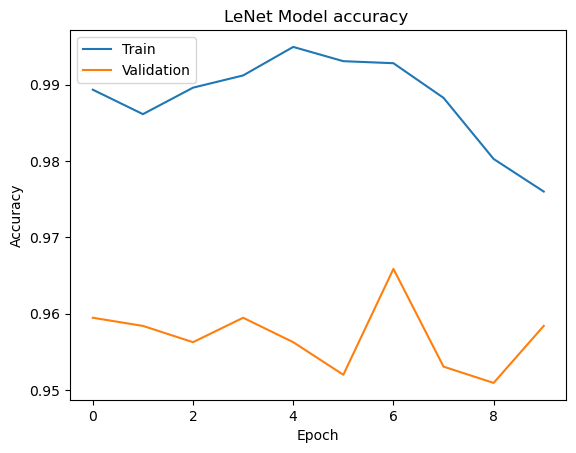

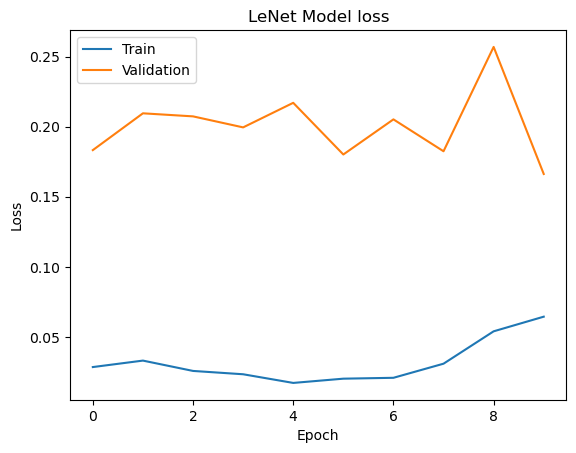

In [337]:
plt.plot(history_lenet.history['accuracy'])
plt.plot(history_lenet.history['val_accuracy'])
plt.title('LeNet Model accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_lenet.history['loss'])
plt.plot(history_lenet.history['val_loss'])
plt.title('LeNet Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [338]:
y_pred_lenet = model_lenet.predict(test_generator_lenet)
y_pred_lenet = np.where(y_pred_lenet > 0.5, 1, 0)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Classification Report
              precision    recall  f1-score   support

      NORMAL     0.8979    0.9061    0.9020       330
   PNEUMONIA     0.9631    0.9596    0.9613       842

    accuracy                         0.9445      1172
   macro avg     0.9305    0.9328    0.9316      1172
weighted avg     0.9447    0.9445    0.9446      1172



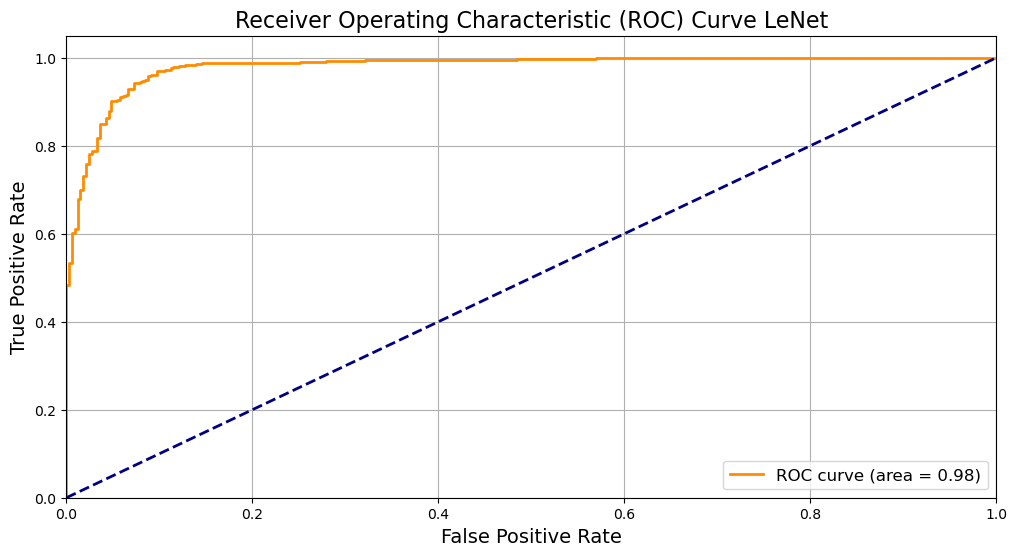

AUC: 0.9796264305765494


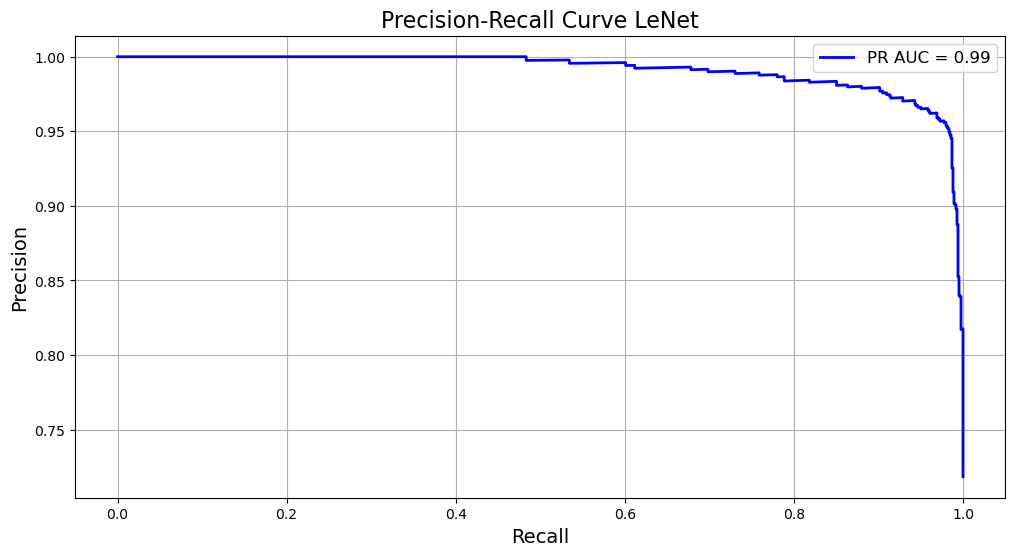

In [353]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

all_probs_lenet = model_lenet.predict(X_test_lenet).ravel()
all_labels_lenet = y_test_lenet

y_pred_lenet = (all_probs_lenet > 0.5).astype("int32")
cr_lenet = classification_report(all_labels_lenet, y_pred_lenet, target_names=['NORMAL', 'PNEUMONIA'], digits=4)
print('Classification Report')
print(cr_lenet)

fpr_lenet, tpr_lenet, _ = roc_curve(all_labels_lenet, all_probs_lenet)
roc_auc_lenet = auc(fpr_lenet, tpr_lenet)

plt.figure(figsize=(12, 6))
plt.plot(fpr_lenet, tpr_lenet, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lenet:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve LeNet', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

print(f'AUC: {roc_auc_lenet}')

precision_lenet, recall_lenet, _ = precision_recall_curve(all_labels_lenet, all_probs_lenet)
pr_auc_lenet = auc(recall_lenet, precision_lenet)

plt.figure(figsize=(12, 6))
plt.plot(recall_lenet, precision_lenet, color='blue', lw=2, label=f'PR AUC = {pr_auc_lenet:.2f}')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve LeNet', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


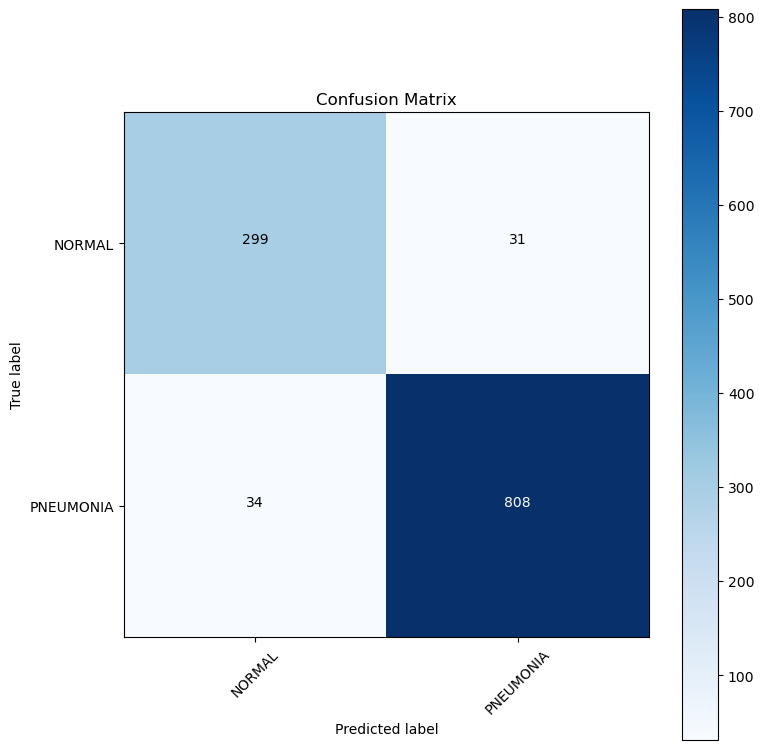

In [340]:
y_pred_lenet = model_lenet.predict(test_generator_lenet)
y_pred_lenet = (y_pred_lenet > 0.5).astype(int).flatten()

cm_lenet = confusion_matrix(y_test_lenet, y_pred_lenet)

plt.figure(figsize=(8,8))
plt.imshow(cm_lenet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['NORMAL', 'PNEUMONIA'], rotation=45)
plt.yticks(tick_marks, ['NORMAL', 'PNEUMONIA'])

thresh = cm_lenet.max() / 2.
for i, j in np.ndindex(cm_lenet.shape):
    plt.text(j, i, format(cm_lenet[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_lenet[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# AlexNet

In [267]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [268]:
data_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DenseNetData'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes


In [269]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [270]:
model_alexnet = models.alexnet(pretrained=True)
num_ftrs = model_alexnet.classifier[6].in_features
model_alexnet.classifier[6] = nn.Linear(num_ftrs, len(class_names))

model_alexnet = model_alexnet.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model_alexnet.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [271]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    y_true = []
    y_pred = []
    y_scores = []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'val':
                    y_true.extend(labels.cpu().numpy())
                    y_pred.extend(preds.cpu().numpy())
                    y_scores.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
                scheduler.step()
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model, train_loss_history, val_loss_history, train_acc_history, val_acc_history, y_true, y_pred, y_scores

model_alexnet, train_loss_history_alexnet, val_loss_history_alexnet, train_acc_history_alexnet, val_acc_history_alexnet, y_true_alexnet, y_pred_alexnet, y_scores_alexnet = train_model(model_alexnet, criterion, optimizer, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.3236 Acc: 0.8583
val Loss: 0.2312 Acc: 0.9007

Epoch 1/9
----------
train Loss: 0.2784 Acc: 0.8868
val Loss: 0.1814 Acc: 0.9253

Epoch 2/9
----------
train Loss: 0.2474 Acc: 0.9002
val Loss: 0.1536 Acc: 0.9530

Epoch 3/9
----------
train Loss: 0.2220 Acc: 0.9111
val Loss: 0.1955 Acc: 0.9178

Epoch 4/9
----------
train Loss: 0.2133 Acc: 0.9175
val Loss: 0.1641 Acc: 0.9360

Epoch 5/9
----------
train Loss: 0.2229 Acc: 0.9106
val Loss: 0.1395 Acc: 0.9616

Epoch 6/9
----------
train Loss: 0.2066 Acc: 0.9154
val Loss: 0.1353 Acc: 0.9605

Epoch 7/9
----------
train Loss: 0.1771 Acc: 0.9293
val Loss: 0.1255 Acc: 0.9605

Epoch 8/9
----------
train Loss: 0.1705 Acc: 0.9365
val Loss: 0.1201 Acc: 0.9648

Epoch 9/9
----------
train Loss: 0.1681 Acc: 0.9314
val Loss: 0.1204 Acc: 0.9616



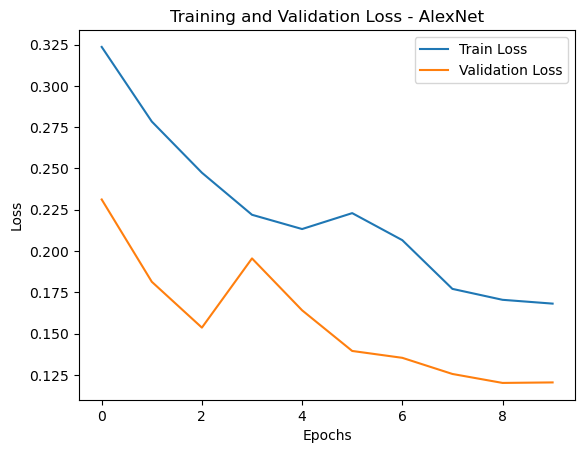

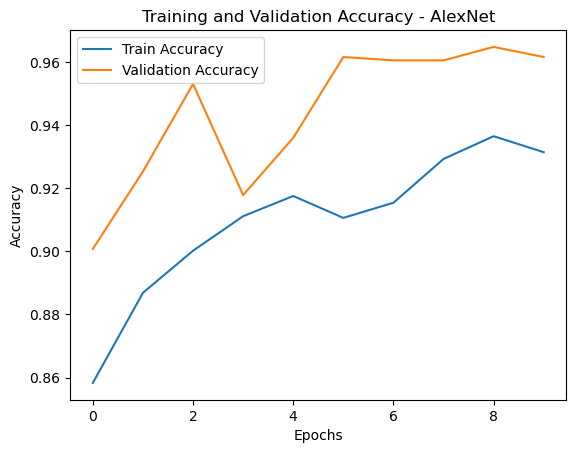

In [272]:
plt.figure()
plt.plot(train_loss_history_alexnet, label='Train Loss')
plt.plot(val_loss_history_alexnet, label='Validation Loss')
plt.title('Training and Validation Loss - AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_acc_history_alexnet, label='Train Accuracy')
plt.plot(val_acc_history_alexnet, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - AlexNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [273]:
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

model_alexnet.eval()
running_corrects = 0
y_true_test_alexnet = []
y_pred_test_alexnet = []
y_scores_test_alexnet = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_alexnet(inputs)
        _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)
        y_true_test_alexnet.extend(labels.cpu().numpy())
        y_pred_test_alexnet.extend(preds.cpu().numpy())
        y_scores_test_alexnet.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

test_accuracy_alexnet = running_corrects.double() / len(test_dataset)
print(f'Test Accuracy: {test_accuracy_alexnet:.4f}')


Test Accuracy: 0.9505


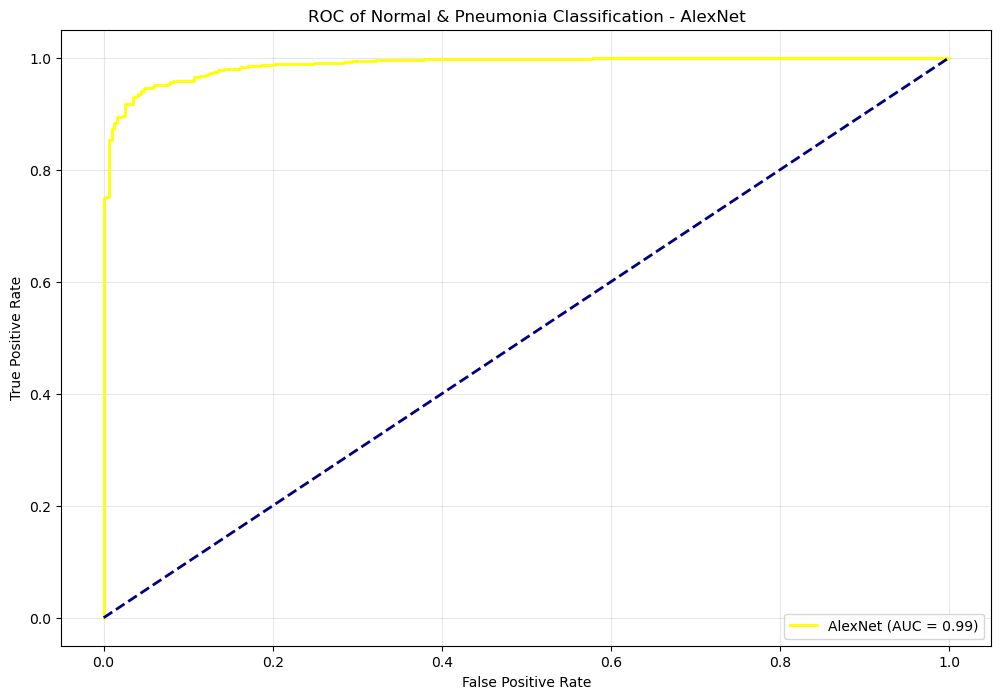

In [362]:
fpr_alexnet, tpr_alexnet, _ = roc_curve(y_true_test_alexnet, y_scores_test_alexnet)
roc_auc_alexnet = auc(fpr_alexnet, tpr_alexnet)

plt.figure(figsize=(12, 8))
plt.plot(fpr_alexnet, tpr_alexnet, color='yellow', lw=2, label='AlexNet (AUC = %0.2f)' % roc_auc_alexnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('ROC of Normal & Pneumonia Classification - AlexNet')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


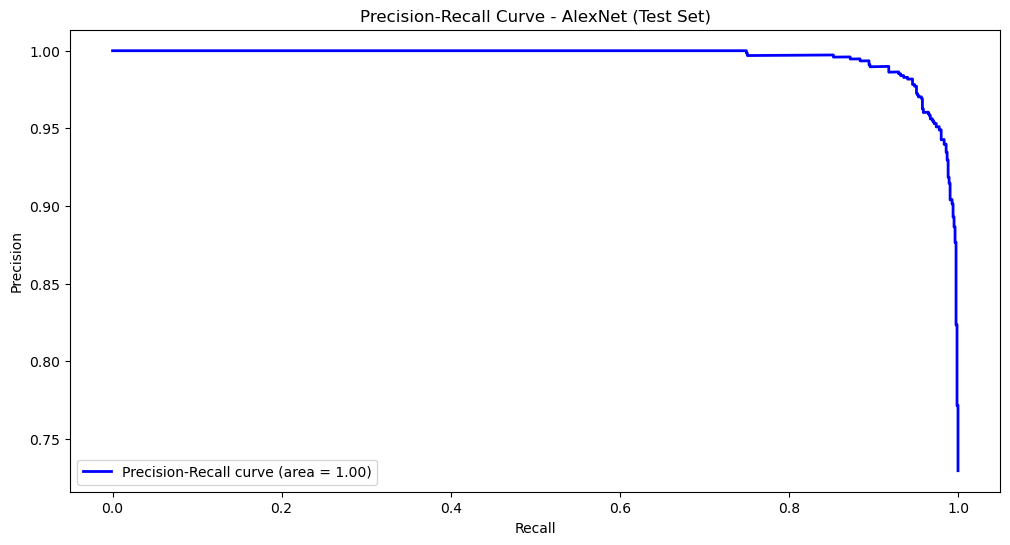

In [289]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_alexnet, recall_alexnet, _ = precision_recall_curve(y_true_test_alexnet, y_scores_test_alexnet)
average_precision_alexnet = average_precision_score(y_true_test_alexnet, y_scores_test_alexnet)

plt.figure(figsize=(12,6))
plt.plot(recall_alexnet, precision_alexnet, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_alexnet)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AlexNet (Test Set)')
plt.legend(loc="lower left")
plt.show()


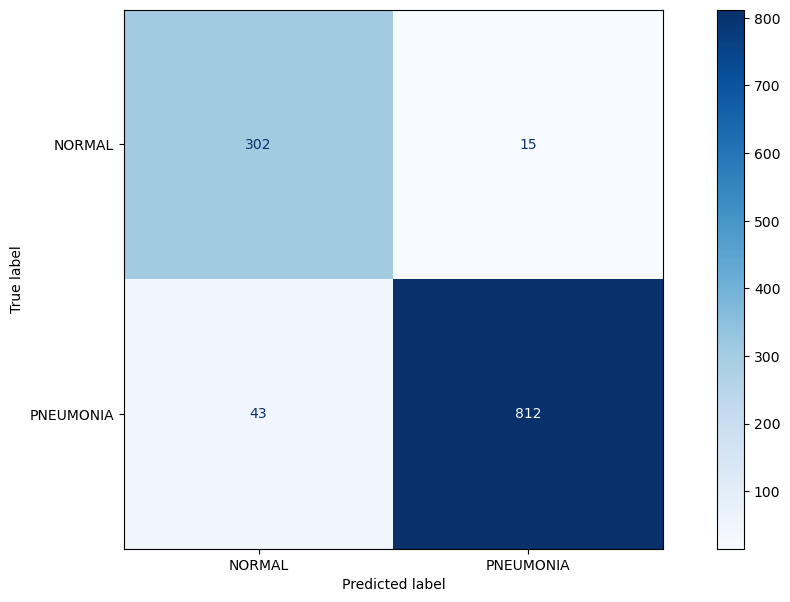

In [372]:
cm_alexnet = confusion_matrix(y_true_test_alexnet, y_pred_test_alexnet)
disp_alexnet = ConfusionMatrixDisplay(confusion_matrix=cm_alexnet, display_labels=class_names)
fig, ax = plt.subplots(figsize=(14,7))
disp_alexnet.plot(ax=ax, cmap=plt.cm.Blues)
plt.show()


In [285]:
print('Classification Report:')
print(classification_report(y_true_test_alexnet, y_pred_test_alexnet, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.88      0.95      0.91       317
   PNEUMONIA       0.98      0.95      0.97       855

    accuracy                           0.95      1172
   macro avg       0.93      0.95      0.94      1172
weighted avg       0.95      0.95      0.95      1172



# SqueezNet

In [157]:
model_squeezenet = models.squeezenet1_1(pretrained=True)
model_squeezenet.classifier[1] = nn.Conv2d(512, len(class_names_resnet), kernel_size=(1, 1), stride=(1, 1))
model_squeezenet.num_classes = len(class_names_resnet)

model_squeezenet = model_squeezenet.to(device)

criterion_squeezenet = nn.CrossEntropyLoss()

optimizer_squeezenet = optim.SGD(model_squeezenet.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler_squeezenet = optim.lr_scheduler.StepLR(optimizer_squeezenet, step_size=7, gamma=0.1)

train_loss_history_squeezenet = []
val_loss_history_squeezenet = []
train_acc_history_squeezenet = []
val_acc_history_squeezenet = []
y_true_squeezenet = []
y_pred_squeezenet = []
y_scores_squeezenet = []

def train_model_squeezenet(model, criterion, optimizer, scheduler, num_epochs=25):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders_resnet[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'val':
                    y_true_squeezenet.extend(labels.cpu().numpy())
                    y_pred_squeezenet.extend(preds.cpu().numpy())
                    y_scores_squeezenet.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

            epoch_loss = running_loss / dataset_sizes_resnet[phase]
            epoch_acc = running_corrects.double() / dataset_sizes_resnet[phase]

            if phase == 'train':
                train_loss_history_squeezenet.append(epoch_loss)
                train_acc_history_squeezenet.append(epoch_acc.item())
                scheduler.step()
            else:
                val_loss_history_squeezenet.append(epoch_loss)
                val_acc_history_squeezenet.append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model

model_squeezenet = train_model_squeezenet(model_squeezenet, criterion_squeezenet, optimizer_squeezenet, exp_lr_scheduler_squeezenet, num_epochs=10)


C:\Users\omer4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\omer4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to C:\Users\omer4/.cache\torch\hub\checkpoints\squeezenet1_1-b8a52dc0.pth
100%|█████████████████████████████████████████████████████████████████████████████| 4.73M/4.73M [00:03<00:00, 1.64MB/s]


Epoch 0/9
----------
train Loss: 0.3682 Acc: 0.8359
val Loss: 0.2448 Acc: 0.8943

Epoch 1/9
----------
train Loss: 0.2990 Acc: 0.8743
val Loss: 0.6347 Acc: 0.6948

Epoch 2/9
----------
train Loss: 0.2714 Acc: 0.8850
val Loss: 0.2241 Acc: 0.9189

Epoch 3/9
----------
train Loss: 0.2355 Acc: 0.8999
val Loss: 0.1671 Acc: 0.9370

Epoch 4/9
----------
train Loss: 0.2165 Acc: 0.9159
val Loss: 0.1571 Acc: 0.9370

Epoch 5/9
----------
train Loss: 0.2088 Acc: 0.9178
val Loss: 0.2446 Acc: 0.9125

Epoch 6/9
----------
train Loss: 0.2241 Acc: 0.9143
val Loss: 0.1957 Acc: 0.9200

Epoch 7/9
----------
train Loss: 0.1729 Acc: 0.9301
val Loss: 0.1259 Acc: 0.9584

Epoch 8/9
----------
train Loss: 0.1656 Acc: 0.9392
val Loss: 0.1250 Acc: 0.9562

Epoch 9/9
----------
train Loss: 0.1618 Acc: 0.9402
val Loss: 0.1135 Acc: 0.9584



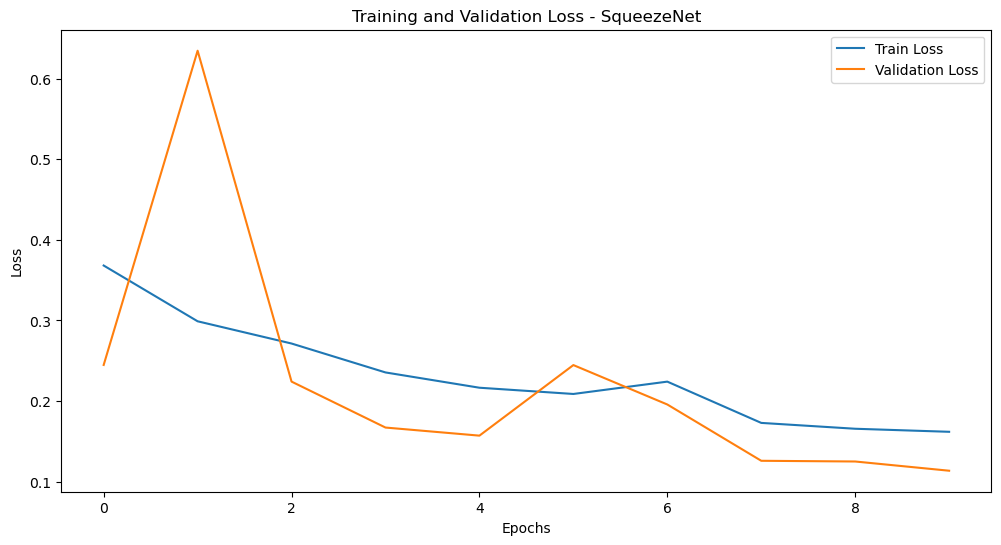

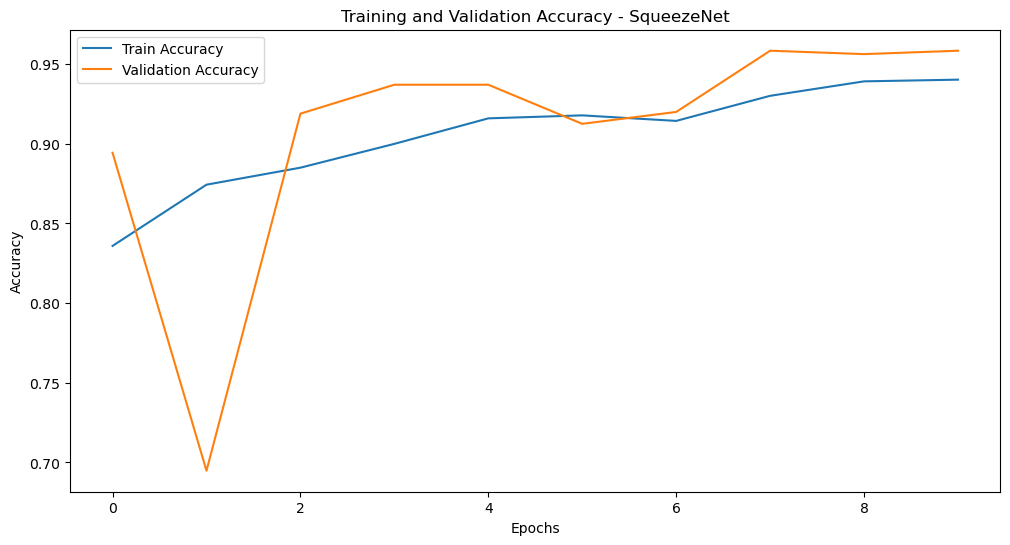

In [345]:
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history_squeezenet, label='Train Loss')
plt.plot(val_loss_history_squeezenet, label='Validation Loss')
plt.title('Training and Validation Loss - SqueezeNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_acc_history_squeezenet, label='Train Accuracy')
plt.plot(val_acc_history_squeezenet, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - SqueezeNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [158]:
model_squeezenet.eval()
running_corrects = 0
y_true_test_squeezenet = []
y_pred_test_squeezenet = []
y_scores_test_squeezenet = []

with torch.no_grad():
    for inputs, labels in test_loader_resnet:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_squeezenet(inputs)
        _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)
        y_true_test_squeezenet.extend(labels.cpu().numpy())
        y_pred_test_squeezenet.extend(preds.cpu().numpy())
        y_scores_test_squeezenet.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

test_accuracy_squeezenet = running_corrects.double() / len(test_dataset_resnet)
print(f'Test Accuracy: {test_accuracy_squeezenet:.4f}')


Test Accuracy: 0.9565


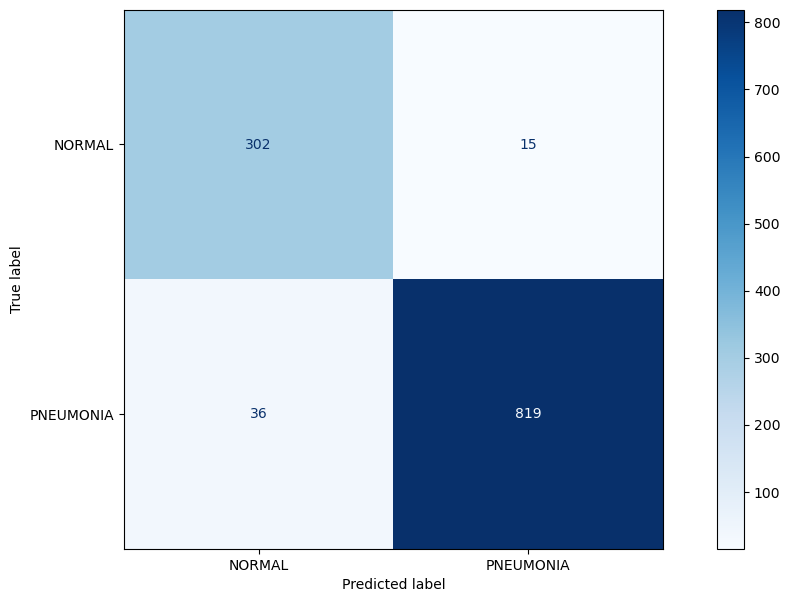

In [246]:
cm_squeezenet_test = confusion_matrix(y_true_test_squeezenet, y_pred_test_squeezenet)
disp_squeezenet_test = ConfusionMatrixDisplay(confusion_matrix=cm_squeezenet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14,7))
disp_squeezenet_test.plot(ax=ax, cmap=plt.cm.Blues)  # Set color map to Blues
plt.show()

In [164]:
print('Classification Report:')
print(classification_report(y_true_test_squeezenet, y_pred_test_squeezenet, target_names=class_names_resnet))

report_squeezenet = classification_report(y_true_test_squeezenet, y_pred_test_squeezenet, target_names=class_names_resnet, output_dict=True)
report_df_squeezenet = pd.DataFrame(report_squeezenet).transpose()



Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.89      0.95      0.92       317
   PNEUMONIA       0.98      0.96      0.97       855

    accuracy                           0.96      1172
   macro avg       0.94      0.96      0.95      1172
weighted avg       0.96      0.96      0.96      1172



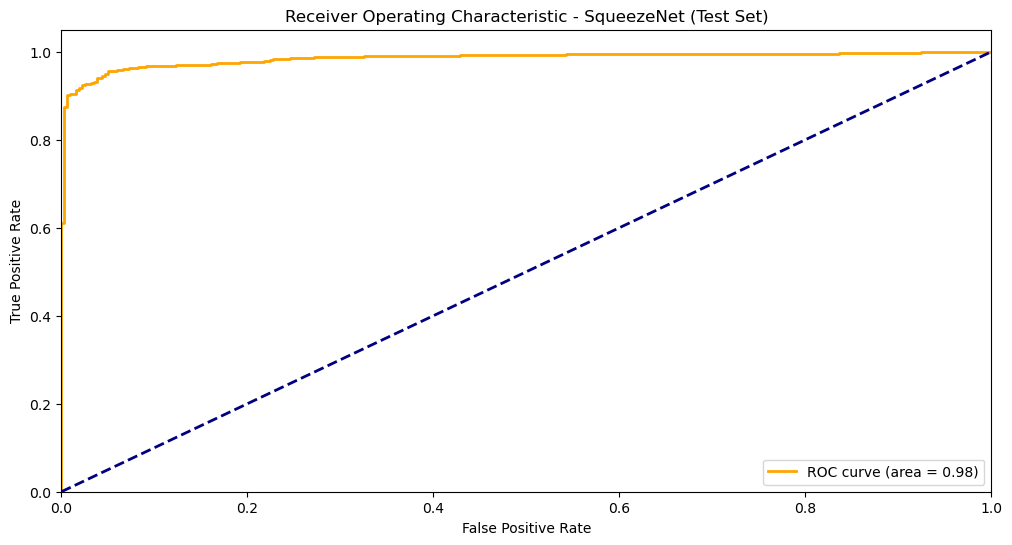

In [240]:
fpr_squeezenet_test, tpr_squeezenet_test, _ = roc_curve(y_true_test_squeezenet, y_scores_test_squeezenet)
roc_auc_squeezenet_test = auc(fpr_squeezenet_test, tpr_squeezenet_test)
plt.figure(figsize=(12, 6))
plt.plot(fpr_squeezenet_test, tpr_squeezenet_test, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_squeezenet_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SqueezeNet (Test Set)')
plt.legend(loc="lower right")
plt.show()


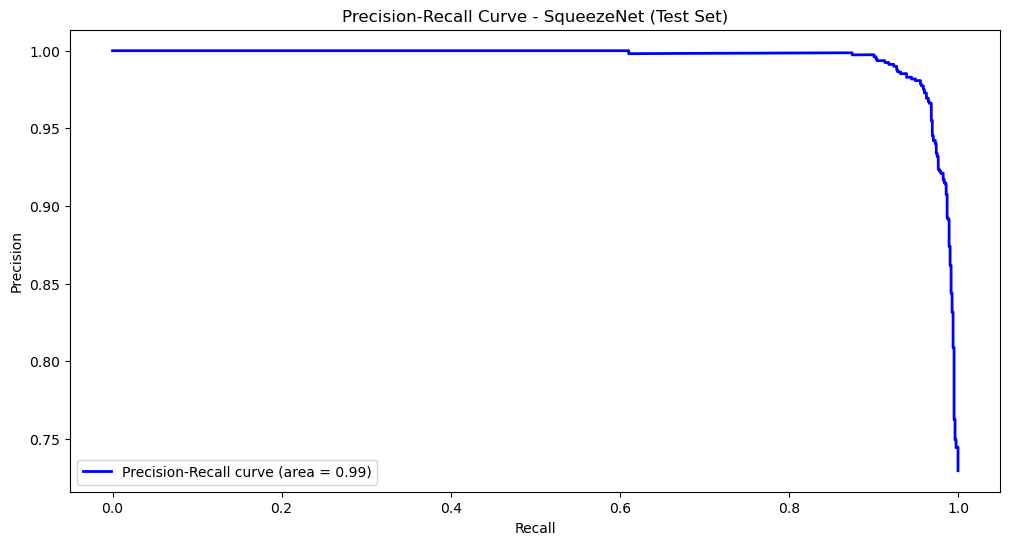

In [239]:
precision_squeezenet, recall_squeezenet, _ = precision_recall_curve(y_true_test_squeezenet, y_scores_test_squeezenet)
average_precision_squeezenet = average_precision_score(y_true_test_squeezenet, y_scores_test_squeezenet)
plt.figure(figsize=(12, 6))
plt.plot(recall_squeezenet, precision_squeezenet, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_squeezenet)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SqueezeNet (Test Set)')
plt.legend(loc="lower left")
plt.show()


# ResNet

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [66]:
data_transforms_resnet = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [67]:
data_dir_resnet = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DenseNetData'
image_datasets_resnet = {x: datasets.ImageFolder(os.path.join(data_dir_resnet, x), data_transforms_resnet[x])
                         for x in ['train', 'val']}
dataloaders_resnet = {x: DataLoader(image_datasets_resnet[x], batch_size=32, shuffle=True, num_workers=4)
                      for x in ['train', 'val']}
dataset_sizes_resnet = {x: len(image_datasets_resnet[x]) for x in ['train', 'val']}
class_names_resnet = image_datasets_resnet['train'].classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [68]:
model_resnet = models.resnet18(pretrained=True)
num_ftrs_resnet = model_resnet.fc.in_features
model_resnet.fc = nn.Linear(num_ftrs_resnet, len(class_names_resnet))


In [69]:
model_resnet = model_resnet.to(device)


In [70]:
criterion_resnet = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_resnet = optim.SGD(model_resnet.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler_resnet = optim.lr_scheduler.StepLR(optimizer_resnet, step_size=7, gamma=0.1)


In [71]:
train_loss_history_resnet = []
val_loss_history_resnet = []
train_acc_history_resnet = []
val_acc_history_resnet = []
y_true_resnet = []
y_pred_resnet = []
y_scores_resnet = []

In [72]:
def train_model_resnet(model, criterion, optimizer, scheduler, num_epochs=25):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders_resnet[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'val':
                    y_true_resnet.extend(labels.cpu().numpy())
                    y_pred_resnet.extend(preds.cpu().numpy())
                    y_scores_resnet.extend(outputs[:, 1].cpu().numpy())

            epoch_loss = running_loss / dataset_sizes_resnet[phase]
            epoch_acc = running_corrects.double() / dataset_sizes_resnet[phase]

            if phase == 'train':
                train_loss_history_resnet.append(epoch_loss)
                train_acc_history_resnet.append(epoch_acc.item())
                scheduler.step()
            else:
                val_loss_history_resnet.append(epoch_loss)
                val_acc_history_resnet.append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model

model_resnet = train_model_resnet(model_resnet, criterion_resnet, optimizer_resnet, exp_lr_scheduler_resnet, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.2965 Acc: 0.8714
val Loss: 0.2091 Acc: 0.9146

Epoch 1/9
----------
train Loss: 0.2086 Acc: 0.9199
val Loss: 0.1278 Acc: 0.9498

Epoch 2/9
----------
train Loss: 0.1929 Acc: 0.9274
val Loss: 0.1867 Acc: 0.9242

Epoch 3/9
----------
train Loss: 0.1836 Acc: 0.9279
val Loss: 0.1251 Acc: 0.9541

Epoch 4/9
----------
train Loss: 0.1570 Acc: 0.9384
val Loss: 0.1064 Acc: 0.9658

Epoch 5/9
----------
train Loss: 0.1487 Acc: 0.9456
val Loss: 0.1051 Acc: 0.9723

Epoch 6/9
----------
train Loss: 0.1393 Acc: 0.9466
val Loss: 0.0982 Acc: 0.9691

Epoch 7/9
----------
train Loss: 0.1316 Acc: 0.9538
val Loss: 0.0949 Acc: 0.9691

Epoch 8/9
----------
train Loss: 0.1214 Acc: 0.9530
val Loss: 0.0990 Acc: 0.9637

Epoch 9/9
----------
train Loss: 0.1183 Acc: 0.9557
val Loss: 0.0935 Acc: 0.9701



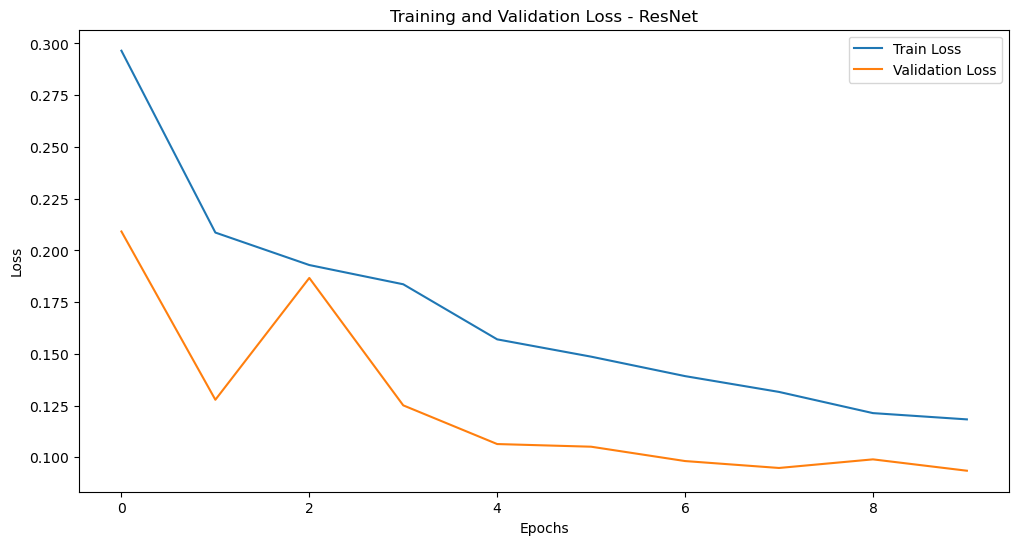

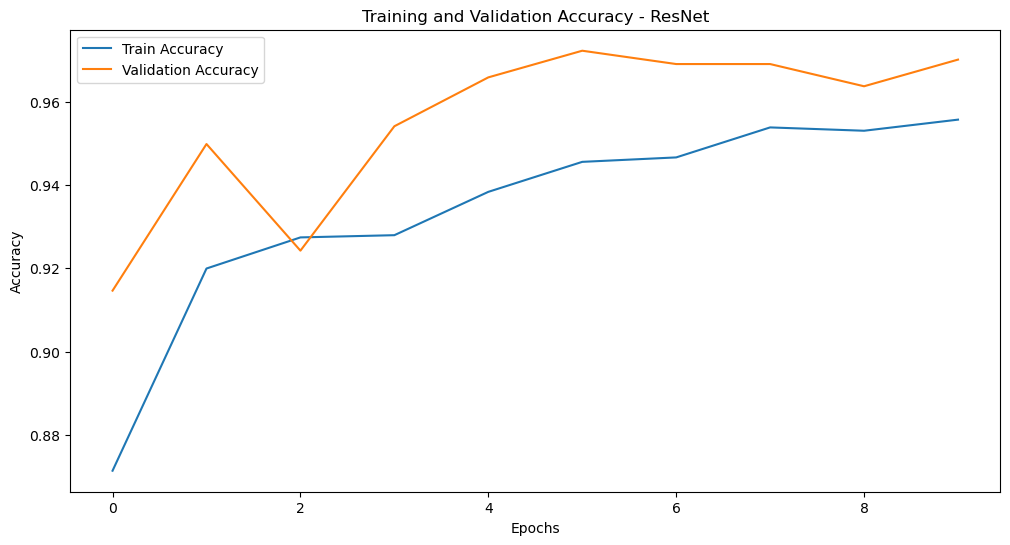

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history_resnet, label='Train Loss')
plt.plot(val_loss_history_resnet, label='Validation Loss')
plt.title('Training and Validation Loss - ResNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_acc_history_resnet, label='Train Accuracy')
plt.plot(val_acc_history_resnet, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - ResNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [130]:
print('Classification Report:')
print(classification_report(y_true_test_resnet, y_pred_test_resnet, target_names=class_names_resnet))

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.88      0.96      0.92       317
   PNEUMONIA       0.99      0.95      0.97       855

    accuracy                           0.95      1172
   macro avg       0.93      0.96      0.94      1172
weighted avg       0.96      0.95      0.95      1172



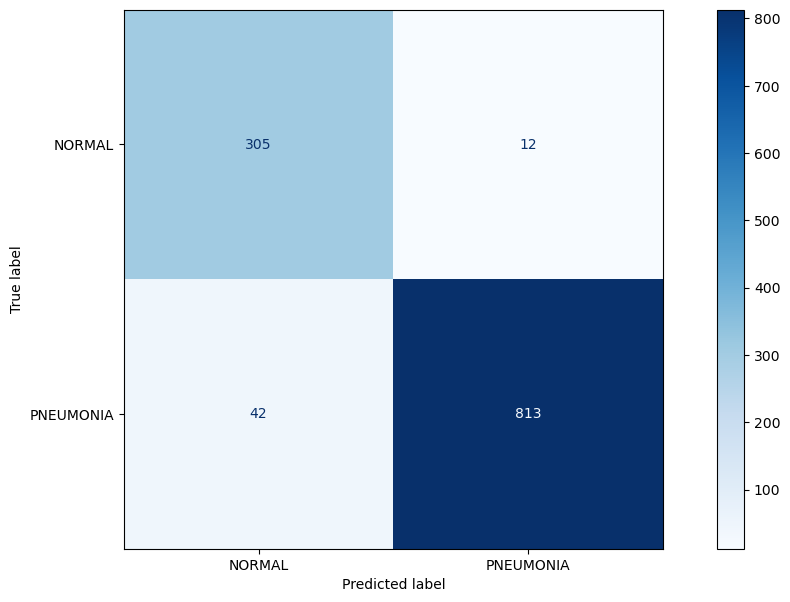

In [236]:
cm_resnet_test = confusion_matrix(y_true_test_resnet, y_pred_test_resnet)
disp_resnet_test = ConfusionMatrixDisplay(confusion_matrix=cm_resnet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14, 7))
disp_resnet_test.plot(ax=ax, cmap=plt.cm.Blues)  # Set color map to Blues
plt.show()


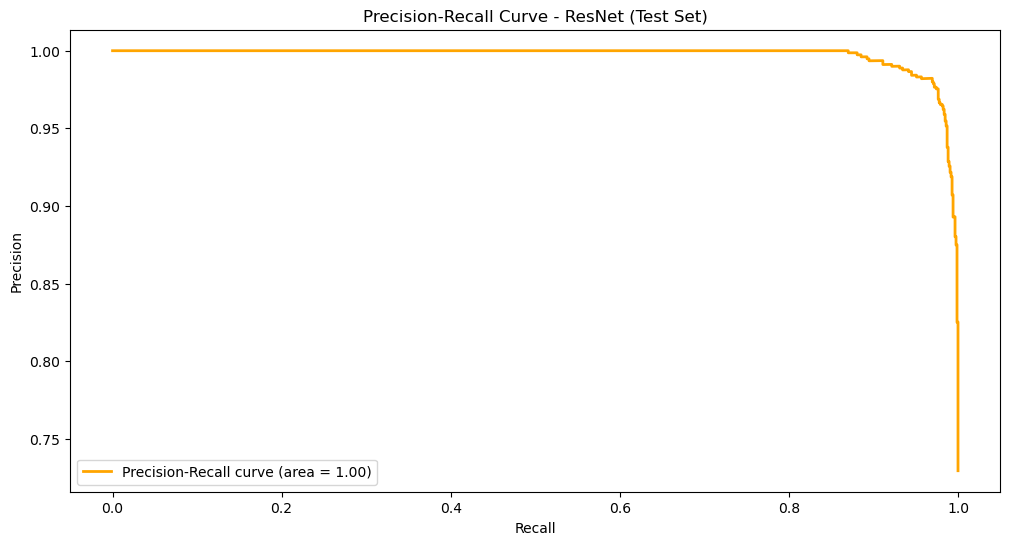

In [233]:
precision, recall, _ = precision_recall_curve(y_true_test_resnet, y_scores_test_resnet)
average_precision = average_precision_score(y_true_test_resnet, y_scores_test_resnet)
plt.figure(figsize=(12, 6))
plt.plot(recall, precision, color='orange', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - ResNet (Test Set)')
plt.legend(loc="lower left")
plt.show()


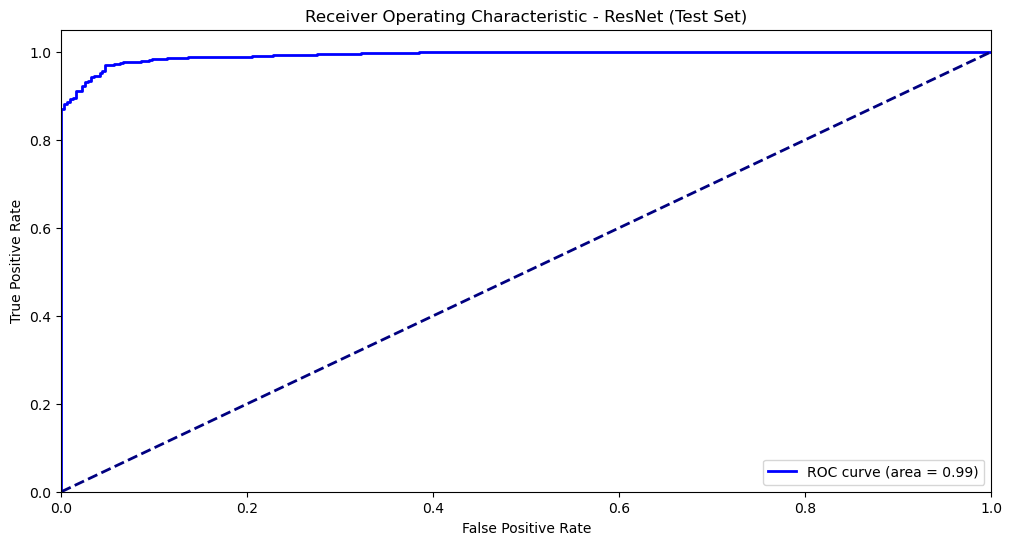

In [250]:
fpr_resnet_test, tpr_resnet_test, _ = roc_curve(y_true_test_resnet, y_scores_test_resnet)
roc_auc_resnet_test = auc(fpr_resnet_test, tpr_resnet_test)
plt.figure(figsize=(12, 6))
plt.plot(fpr_resnet_test, tpr_resnet_test, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_resnet_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - ResNet (Test Set)')
plt.legend(loc="lower right")
plt.show()


# DenseNet

In [ ]:
data_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DATA'
classes = ['NORMAL', 'PNEUMONIA']

split_dirs = ['train', 'val', 'test']
base_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DenseNetData'

In [ ]:
for split_dir in split_dirs:
    for class_name in classes:
        os.makedirs(os.path.join(base_dir, split_dir, class_name), exist_ok=True)

filepaths = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for fname in os.listdir(class_dir):
        filepaths.append(os.path.join(class_dir, fname))
        labels.append(class_name)

filepaths = np.array(filepaths)
labels = np.array(labels)

In [ ]:
train_files, test_files, train_labels, test_labels = train_test_split(filepaths, labels, test_size=0.2, stratify=labels, random_state=42)
train_files, val_files, train_labels, val_labels = train_test_split(train_files, train_labels, test_size=0.2, stratify=train_labels, random_state=42)


In [ ]:
def copy_files(filepaths, labels, split):
    for filepath, label in zip(filepaths, labels):
        split_dir = os.path.join(base_dir, split, label)
        shutil.copy(filepath, split_dir)

copy_files(train_files, train_labels, 'train')
copy_files(val_files, val_labels, 'val')
copy_files(test_files, test_labels, 'test')

img_height, img_width = 224, 224
batch_size = 32

In [168]:
model_densenet = models.densenet121(pretrained=True)
num_ftrs_densenet = model_densenet.classifier.in_features
model_densenet.classifier = nn.Linear(num_ftrs_densenet, len(class_names_resnet))

model_densenet = model_densenet.to(device)

criterion_densenet = nn.CrossEntropyLoss()

optimizer_densenet = optim.SGD(model_densenet.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler_densenet = optim.lr_scheduler.StepLR(optimizer_densenet, step_size=7, gamma=0.1)

train_loss_history_densenet = []
val_loss_history_densenet = []
train_acc_history_densenet = []
val_acc_history_densenet = []
y_true_densenet = []
y_pred_densenet = []
y_scores_densenet = []

def train_model_densenet(model, criterion, optimizer, scheduler, num_epochs=25):
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders_resnet[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                if phase == 'val':
                    y_true_densenet.extend(labels.cpu().numpy())
                    y_pred_densenet.extend(preds.cpu().numpy())
                    y_scores_densenet.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

            epoch_loss = running_loss / dataset_sizes_resnet[phase]
            epoch_acc = running_corrects.double() / dataset_sizes_resnet[phase]

            if phase == 'train':
                train_loss_history_densenet.append(epoch_loss)
                train_acc_history_densenet.append(epoch_acc.item())
                scheduler.step()
            else:
                val_loss_history_densenet.append(epoch_loss)
                val_acc_history_densenet.append(epoch_acc.item())

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

        print()

    return model

model_densenet = train_model_densenet(model_densenet, criterion_densenet, optimizer_densenet, exp_lr_scheduler_densenet, num_epochs=10)


C:\Users\omer4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\omer4\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/9
----------
train Loss: 0.3212 Acc: 0.8567
val Loss: 0.1566 Acc: 0.9370

Epoch 1/9
----------
train Loss: 0.2074 Acc: 0.9205
val Loss: 0.1242 Acc: 0.9584

Epoch 2/9
----------
train Loss: 0.1945 Acc: 0.9253
val Loss: 0.1321 Acc: 0.9562

Epoch 3/9
----------
train Loss: 0.1529 Acc: 0.9421
val Loss: 0.1541 Acc: 0.9370

Epoch 4/9
----------
train Loss: 0.1441 Acc: 0.9416
val Loss: 0.1094 Acc: 0.9605

Epoch 5/9
----------
train Loss: 0.1505 Acc: 0.9373
val Loss: 0.1098 Acc: 0.9648

Epoch 6/9
----------
train Loss: 0.1284 Acc: 0.9512
val Loss: 0.1252 Acc: 0.9573

Epoch 7/9
----------
train Loss: 0.1118 Acc: 0.9592
val Loss: 0.1043 Acc: 0.9584

Epoch 8/9
----------
train Loss: 0.1077 Acc: 0.9600
val Loss: 0.0980 Acc: 0.9626

Epoch 9/9
----------
train Loss: 0.1233 Acc: 0.9565
val Loss: 0.0901 Acc: 0.9712



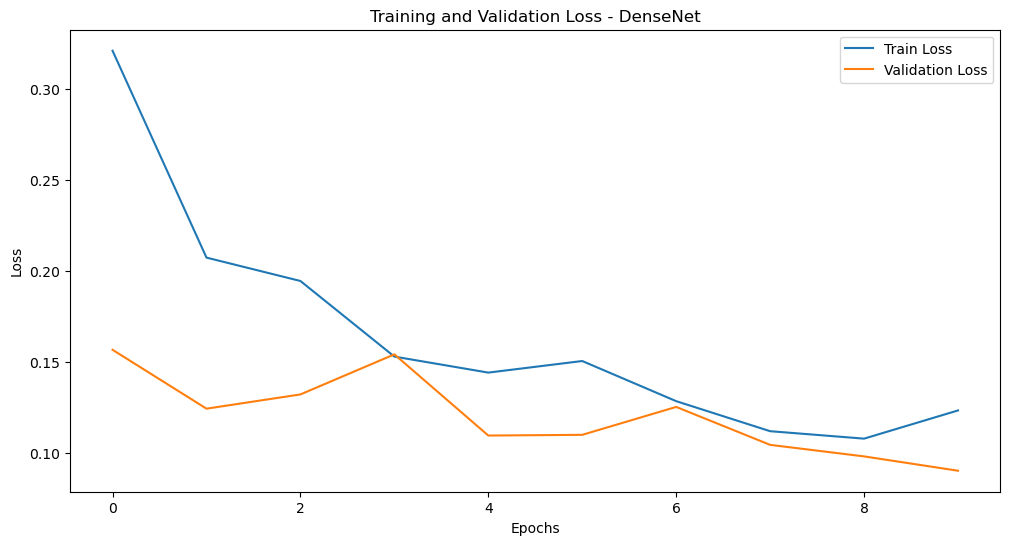

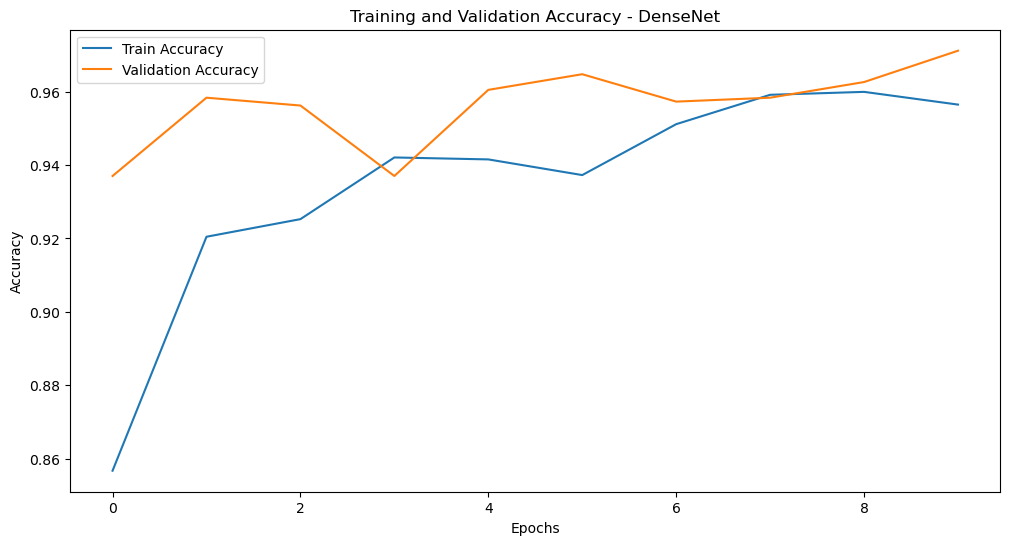

In [257]:
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history_densenet, label='Train Loss')
plt.plot(val_loss_history_densenet, label='Validation Loss')
plt.title('Training and Validation Loss - DenseNet')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_acc_history_densenet, label='Train Accuracy')
plt.plot(val_acc_history_densenet, label='Validation Accuracy')
plt.title('Training and Validation Accuracy - DenseNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [258]:
model_densenet.eval()
running_corrects = 0
y_true_test_densenet = []
y_pred_test_densenet = []
y_scores_test_densenet = []

with torch.no_grad():
    for inputs, labels in test_loader_resnet:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model_densenet(inputs)
        _, preds = torch.max(outputs, 1)

        running_corrects += torch.sum(preds == labels.data)
        y_true_test_densenet.extend(labels.cpu().numpy())
        y_pred_test_densenet.extend(preds.cpu().numpy())
        y_scores_test_densenet.extend(outputs[:, 1].cpu().numpy())  # Assuming the second column is for the positive class

test_accuracy_densenet = running_corrects.double() / len(test_dataset_resnet)
print(f'Test Accuracy: {test_accuracy_densenet:.4f}')


Test Accuracy: 0.9573


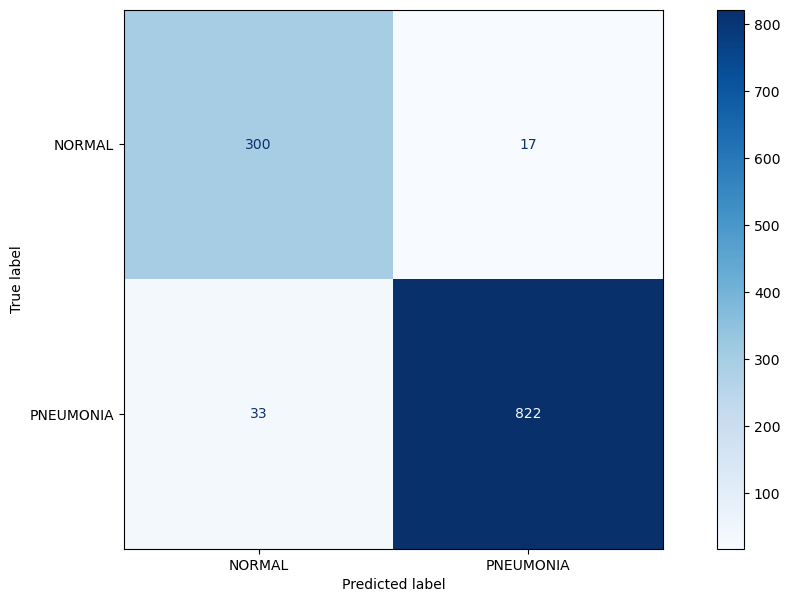

<Figure size 1200x600 with 0 Axes>

In [252]:
cm_densenet_test = confusion_matrix(y_true_test_densenet, y_pred_test_densenet)
disp_densenet_test = ConfusionMatrixDisplay(confusion_matrix=cm_densenet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14, 7))
disp_densenet_test.plot(ax=ax, cmap=plt.cm.Blues)  # Set color map to Blues
plt.figure(figsize=(12, 6))
plt.show()


In [176]:
print('Classification Report:')
print(classification_report(y_true_test_densenet, y_pred_test_densenet, target_names=class_names_resnet))

report_densenet = classification_report(y_true_test_densenet, y_pred_test_densenet, target_names=class_names_resnet, output_dict=True)
report_df_densenet = pd.DataFrame(report_densenet).transpose()

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.90      0.95      0.92       317
   PNEUMONIA       0.98      0.96      0.97       855

    accuracy                           0.96      1172
   macro avg       0.94      0.95      0.95      1172
weighted avg       0.96      0.96      0.96      1172



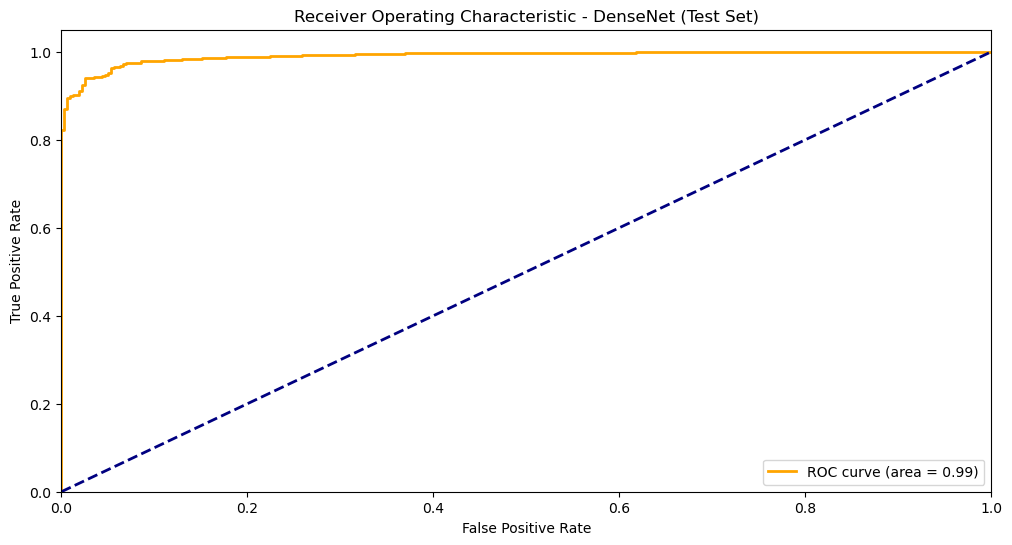

In [229]:
fpr_densenet_test, tpr_densenet_test, _ = roc_curve(y_true_test_densenet, y_scores_test_densenet)
roc_auc_densenet_test = auc(fpr_densenet_test, tpr_densenet_test)
plt.figure(figsize=(12, 6))
plt.plot(fpr_densenet_test, tpr_densenet_test, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_densenet_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - DenseNet (Test Set)')
plt.legend(loc="lower right")
plt.show()


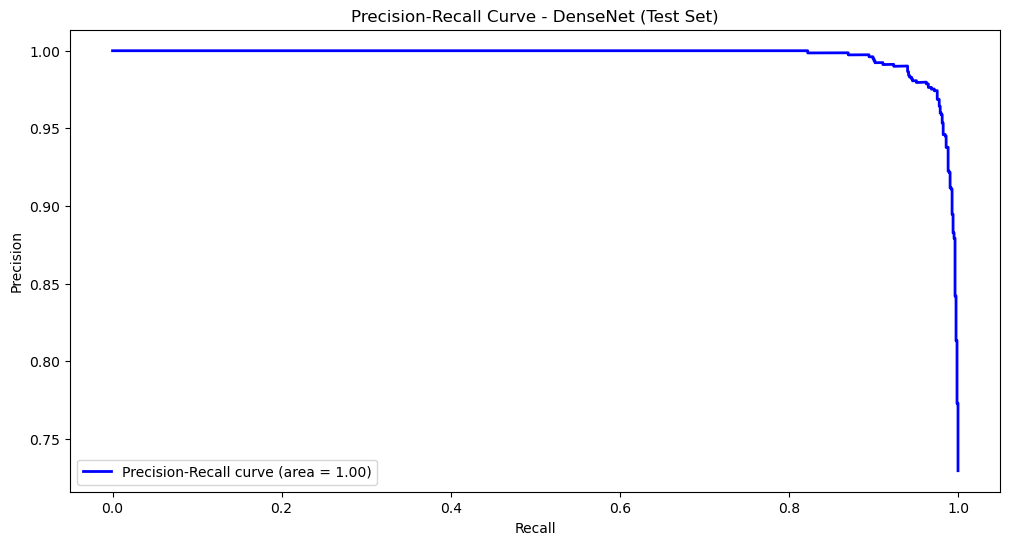

In [228]:
precision_densenet, recall_densenet, _ = precision_recall_curve(y_true_test_densenet, y_scores_test_densenet)
average_precision_densenet = average_precision_score(y_true_test_densenet, y_scores_test_densenet)
plt.figure(figsize=(12, 6))
plt.plot(recall_densenet, precision_densenet, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision_densenet)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - DenseNet (Test Set)')
plt.legend(loc="lower left")
plt.show()


# MEAN STD

In [137]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

normal_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DATA/NORMAL'
pneumonia_dir = 'C:/Users/omer4/OneDrive/Masaüstü/İTÜ/İTÜ-2023GÜZ/MAT490E - DESIGN/DATA/PNEUMONIA'

normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
pneumonia_images = [os.path.join(pneumonia_dir, img) for img in os.listdir(pneumonia_dir)]
all_images = normal_images + pneumonia_images

mean = np.zeros(3)
std = np.zeros(3)
nb_samples = 0

for img_path in tqdm(all_images):
    image = Image.open(img_path).convert('RGB')
    image = image.resize((224, 224))  # Görüntü boyutunu ayarla
    image = np.array(image) / 255.0  # Görüntüyü numpy array'e çevir ve normalize et [0, 1] aralığına
    mean += image.mean(axis=(0, 1))
    std += image.std(axis=(0, 1))
    nb_samples += 1

mean /= nb_samples
std /= nb_samples

print(f"Ortalama: {mean}")
print(f"Standart Sapma: {std}")

100%|██████████████████████████████████████████████████████████████████████████████| 5856/5856 [02:05<00:00, 46.61it/s]


Ortalama: [0.48152519 0.48152519 0.48152519]
Standart Sapma: [0.22245627 0.22245627 0.22245627]


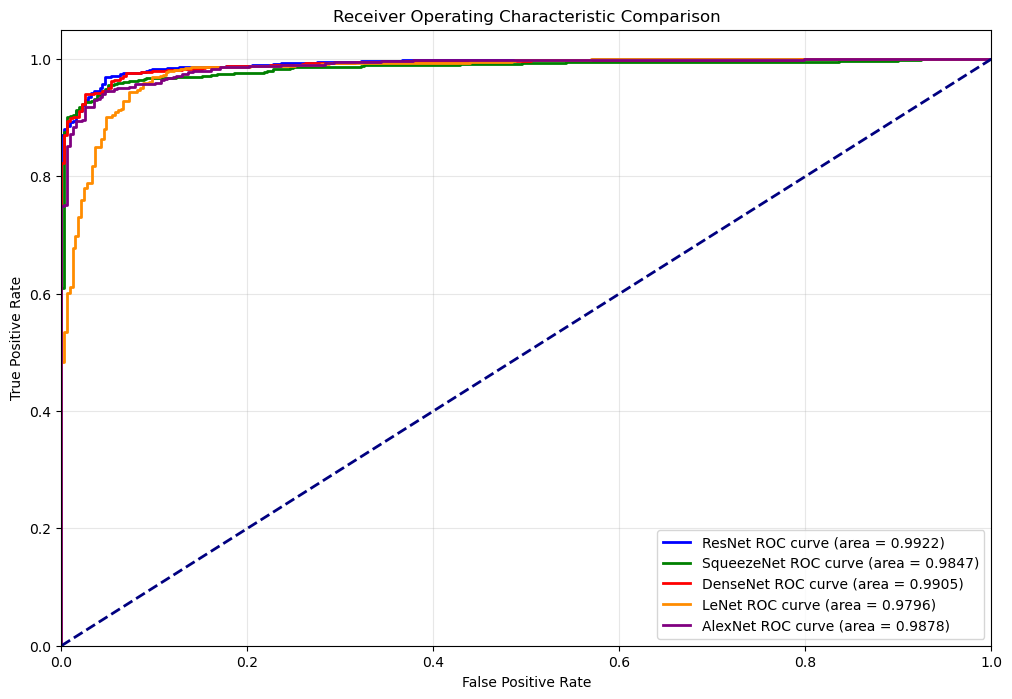

In [346]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_alexnet, tpr_alexnet, _ = roc_curve(y_true_test_alexnet, y_scores_test_alexnet)
roc_auc_alexnet = auc(fpr_alexnet, tpr_alexnet)

plt.figure(figsize=(12, 8))
plt.plot(fpr_resnet, tpr_resnet, color='blue', lw=2, label='ResNet ROC curve (area = %0.4f)' % roc_auc_resnet)
plt.plot(fpr_squeezenet, tpr_squeezenet, color='green', lw=2, label='SqueezeNet ROC curve (area = %0.4f)' % roc_auc_squeezenet)
plt.plot(fpr_densenet, tpr_densenet, color='red', lw=2, label='DenseNet ROC curve (area = %0.4f)' % roc_auc_densenet)
plt.plot(fpr_lenet, tpr_lenet, color='darkorange', lw=2, label='LeNet ROC curve (area = %0.4f)' % roc_auc_lenet)
plt.plot(fpr_alexnet, tpr_alexnet, color='purple', lw=2, label='AlexNet ROC curve (area = %0.4f)' % roc_auc_alexnet)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Comparison')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [347]:
print('ResNet ROC curve (area = %0.4f)' % roc_auc_resnet)
print('SqueezeNet ROC curve (area = %0.4f)' % roc_auc_squeezenet)
print('DenseNet ROC curve (area = %0.4f)' % roc_auc_densenet)
print('LeNet ROC curve (area = %0.4f)' % roc_auc_lenet)
print('AlexNet ROC curve (area = %0.4f)' % roc_auc_alexnet)

ResNet ROC curve (area = 0.9922)
SqueezeNet ROC curve (area = 0.9847)
DenseNet ROC curve (area = 0.9905)
LeNet ROC curve (area = 0.9796)
AlexNet ROC curve (area = 0.9878)


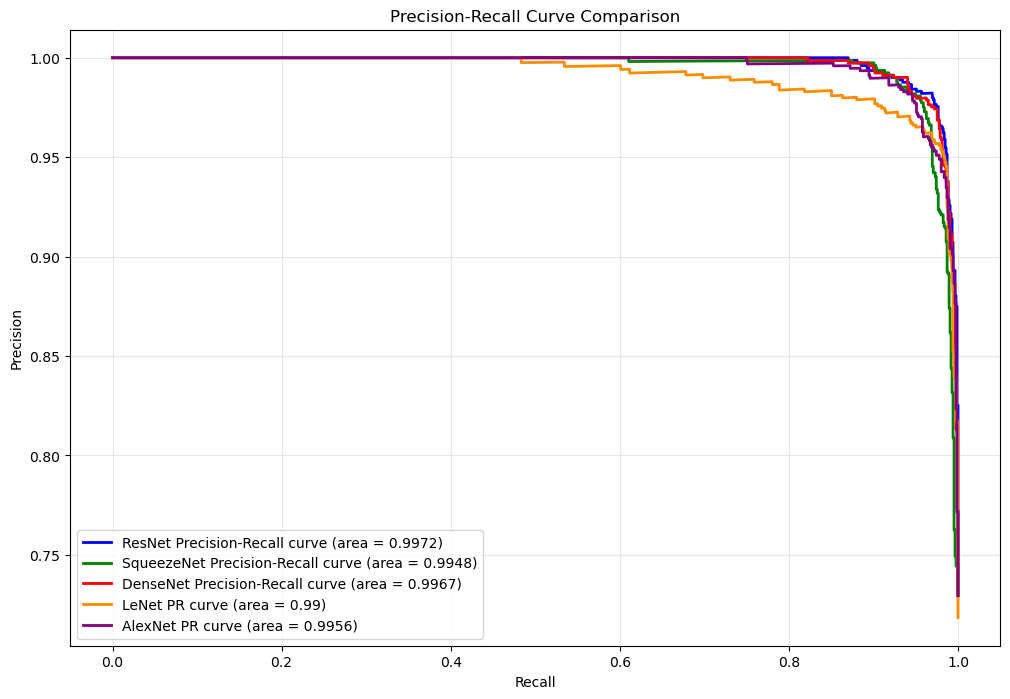

In [354]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_resnet, recall_resnet, _ = precision_recall_curve(y_true_test_resnet, y_scores_test_resnet)
average_precision_resnet = average_precision_score(y_true_test_resnet, y_scores_test_resnet)

precision_squeezenet, recall_squeezenet, _ = precision_recall_curve(y_true_test_squeezenet, y_scores_test_squeezenet)
average_precision_squeezenet = average_precision_score(y_true_test_squeezenet, y_scores_test_squeezenet)

precision_densenet, recall_densenet, _ = precision_recall_curve(y_true_test_densenet, y_scores_test_densenet)
average_precision_densenet = average_precision_score(y_true_test_densenet, y_scores_test_densenet)


precision_alexnet, recall_alexnet, _ = precision_recall_curve(y_true_test_alexnet, y_scores_test_alexnet)
average_precision_alexnet = average_precision_score(y_true_test_alexnet, y_scores_test_alexnet)

plt.figure(figsize=(12, 8))
plt.plot(recall_resnet, precision_resnet, color='blue', lw=2, label='ResNet Precision-Recall curve (area = %0.4f)' % average_precision_resnet)
plt.plot(recall_squeezenet, precision_squeezenet, color='green', lw=2, label='SqueezeNet Precision-Recall curve (area = %0.4f)' % average_precision_squeezenet)
plt.plot(recall_densenet, precision_densenet, color='red', lw=2, label='DenseNet Precision-Recall curve (area = %0.4f)' % average_precision_densenet)
plt.plot(recall_lenet, precision_lenet, color='darkorange', lw=2, label=f'LeNet PR curve (area = {pr_auc_lenet:.2f})')
plt.plot(recall_alexnet, precision_alexnet, color='purple', lw=2, label='AlexNet PR curve (area = %0.4f)' % average_precision_alexnet)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()


In [350]:
print('ResNet Precision-Recall curve (area = %0.4f)' % average_precision_resnet)
print('SqueezeNet Precision-Recall curve (area = %0.4f)' % average_precision_squeezenet)
print('DenseNet Precision-Recall curve (area = %0.4f)' % average_precision_densenet)
print('AlexNet PR curve (area = %0.4f)' % average_precision_alexnet)


ResNet Precision-Recall curve (area = 0.9972)
SqueezeNet Precision-Recall curve (area = 0.9948)
DenseNet Precision-Recall curve (area = 0.9967)
LeNet PR curve (area = {pr_auc_lenet:.4f})
AlexNet PR curve (area = 0.9956)


In [351]:
pr_auc_lenet

0.9912852148136537

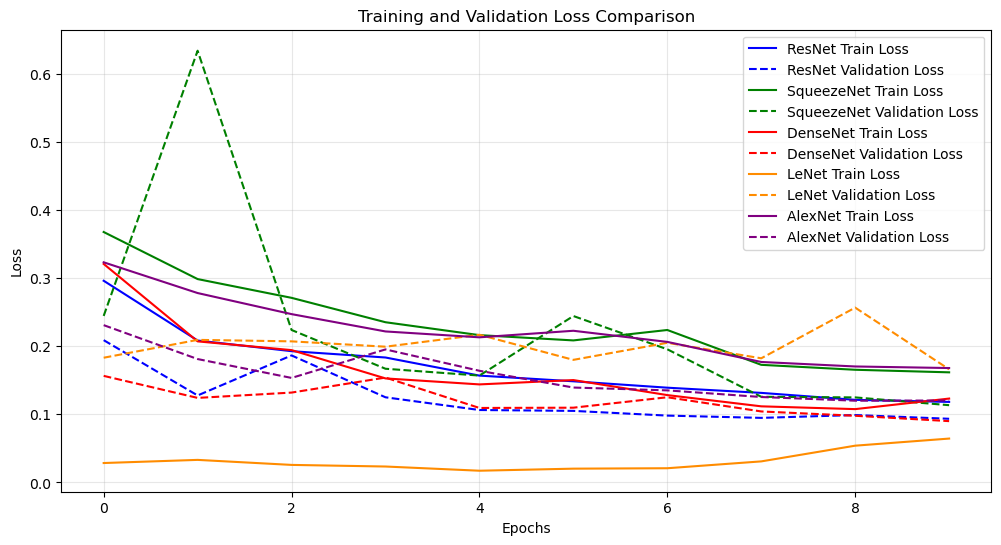

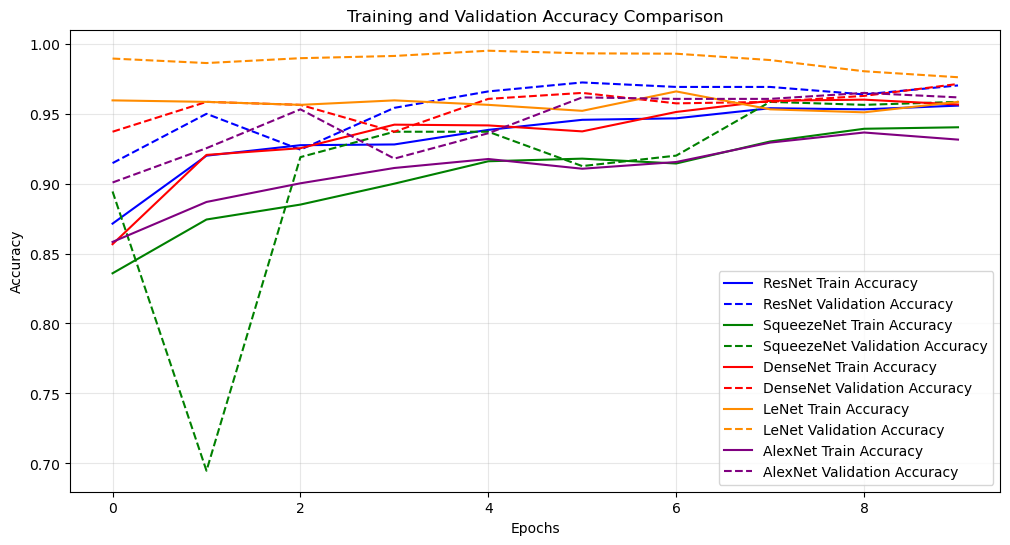

In [341]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(train_loss_history_resnet, label='ResNet Train Loss', color='blue')
plt.plot(val_loss_history_resnet, label='ResNet Validation Loss', color='blue', linestyle='dashed')
plt.plot(train_loss_history_squeezenet, label='SqueezeNet Train Loss', color='green')
plt.plot(val_loss_history_squeezenet, label='SqueezeNet Validation Loss', color='green', linestyle='dashed')
plt.plot(train_loss_history_densenet, label='DenseNet Train Loss', color='red')
plt.plot(val_loss_history_densenet, label='DenseNet Validation Loss', color='red', linestyle='dashed')
plt.plot(history_lenet.history['loss'], label='LeNet Train Loss', color='darkorange')
plt.plot(history_lenet.history['val_loss'], label='LeNet Validation Loss', color='darkorange', linestyle='dashed')
plt.plot(train_loss_history_alexnet, label='AlexNet Train Loss', color='purple')
plt.plot(val_loss_history_alexnet, label='AlexNet Validation Loss', color='purple', linestyle='dashed')
plt.title('Training and Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_acc_history_resnet, label='ResNet Train Accuracy', color='blue')
plt.plot(val_acc_history_resnet, label='ResNet Validation Accuracy', color='blue', linestyle='dashed')
plt.plot(train_acc_history_squeezenet, label='SqueezeNet Train Accuracy', color='green')
plt.plot(val_acc_history_squeezenet, label='SqueezeNet Validation Accuracy', color='green', linestyle='dashed')
plt.plot(train_acc_history_densenet, label='DenseNet Train Accuracy', color='red')
plt.plot(val_acc_history_densenet, label='DenseNet Validation Accuracy', color='red', linestyle='dashed')
plt.plot(history_lenet.history['val_accuracy'], label='LeNet Train Accuracy', color='darkorange')
plt.plot(history_lenet.history['accuracy'], label='LeNet Validation Accuracy', color='darkorange', linestyle='dashed')
plt.plot(train_acc_history_alexnet, label='AlexNet Train Accuracy', color='purple')
plt.plot(val_acc_history_alexnet, label='AlexNet Validation Accuracy', color='purple', linestyle='dashed')
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [326]:
from sklearn.metrics import classification_report

def format_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    formatted_report = {}
    for key, value in report.items():
        if isinstance(value, dict):
            formatted_report[key] = {k: f"{v:.4f}" for k, v in value.items()}
        else:
            formatted_report[key] = f"{value:.4f}"
    return formatted_report

def print_formatted_report(report):
    for key, value in report.items():
        if isinstance(value, dict):
            print(f"{key}:")
            for sub_key, sub_value in value.items():
                print(f"  {sub_key}: {sub_value}")
        else:
            print(f"{key}: {value}")


In [332]:
import pandas as pd
from sklearn.metrics import classification_report

def format_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)
    return report_df

def print_classification_report(report_df, model_name):
    print(f"\nClassification Report - {model_name}:\n")
    print(report_df)


report_resnet = format_classification_report(y_true_test_resnet, y_pred_test_resnet, class_names_resnet)
print_classification_report(report_resnet, "ResNet")

report_squeezenet = format_classification_report(y_true_test_squeezenet, y_pred_test_squeezenet, class_names_resnet)
print_classification_report(report_squeezenet, "SqueezeNet")

report_densenet = format_classification_report(y_true_test_densenet, y_pred_test_densenet, class_names_resnet)
print_classification_report(report_densenet, "DenseNet")

report_alexnet = format_classification_report(y_true_test_alexnet, y_pred_test_alexnet, class_names_resnet)
print_classification_report(report_alexnet, "AlexNet")



Classification Report - ResNet:

             precision  recall f1-score    support
NORMAL          0.8790  0.9621   0.9187   317.0000
PNEUMONIA       0.9855  0.9509   0.9679   855.0000
accuracy        0.9539  0.9539   0.9539     0.9539
macro avg       0.9322  0.9565   0.9433  1172.0000
weighted avg    0.9567  0.9539   0.9546  1172.0000

Classification Report - SqueezeNet:

             precision  recall f1-score    support
NORMAL          0.8935  0.9527   0.9221   317.0000
PNEUMONIA       0.9820  0.9579   0.9698   855.0000
accuracy        0.9565  0.9565   0.9565     0.9565
macro avg       0.9378  0.9553   0.9460  1172.0000
weighted avg    0.9581  0.9565   0.9569  1172.0000

Classification Report - DenseNet:

             precision  recall f1-score    support
NORMAL          0.9009  0.9464   0.9231   317.0000
PNEUMONIA       0.9797  0.9614   0.9705   855.0000
accuracy        0.9573  0.9573   0.9573     0.9573
macro avg       0.9403  0.9539   0.9468  1172.0000
weighted avg    0.9584  0

C:\Users\omer4\AppData\Local\Temp\ipykernel_15880\4275619797.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)
C:\Users\omer4\AppData\Local\Temp\ipykernel_15880\4275619797.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)
C:\Users\omer4\AppData\Local\Temp\ipykernel_15880\4275619797.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)
C:\Users\omer4\AppData\Local\Temp\ipykernel_15880\4275619797.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_df = report_df.applymap(lambda x: f"{x:.4f}" if isinstance(x, float) else x)


In [327]:
print('Classification Report - ResNet:')
print(classification_report(y_true_test_resnet, y_pred_test_resnet, target_names=class_names_resnet))

print('Classification Report - SqueezeNet:')
print(classification_report(y_true_test_squeezenet, y_pred_test_squeezenet, target_names=class_names_resnet))

print('Classification Report - DenseNet:')
print(classification_report(y_true_test_densenet, y_pred_test_densenet, target_names=class_names_resnet))

print('Classification Report - LeNet:')
print(cr_lenet)

print('Classification Report - AlexNet:')
print(classification_report(y_true_test_alexnet, y_pred_test_alexnet, target_names=class_names_resnet))



Classification Report - ResNet:
              precision    recall  f1-score   support

      NORMAL       0.88      0.96      0.92       317
   PNEUMONIA       0.99      0.95      0.97       855

    accuracy                           0.95      1172
   macro avg       0.93      0.96      0.94      1172
weighted avg       0.96      0.95      0.95      1172

Classification Report - SqueezeNet:
              precision    recall  f1-score   support

      NORMAL       0.89      0.95      0.92       317
   PNEUMONIA       0.98      0.96      0.97       855

    accuracy                           0.96      1172
   macro avg       0.94      0.96      0.95      1172
weighted avg       0.96      0.96      0.96      1172

Classification Report - DenseNet:
              precision    recall  f1-score   support

      NORMAL       0.90      0.95      0.92       317
   PNEUMONIA       0.98      0.96      0.97       855

    accuracy                           0.96      1172
   macro avg       0.94   

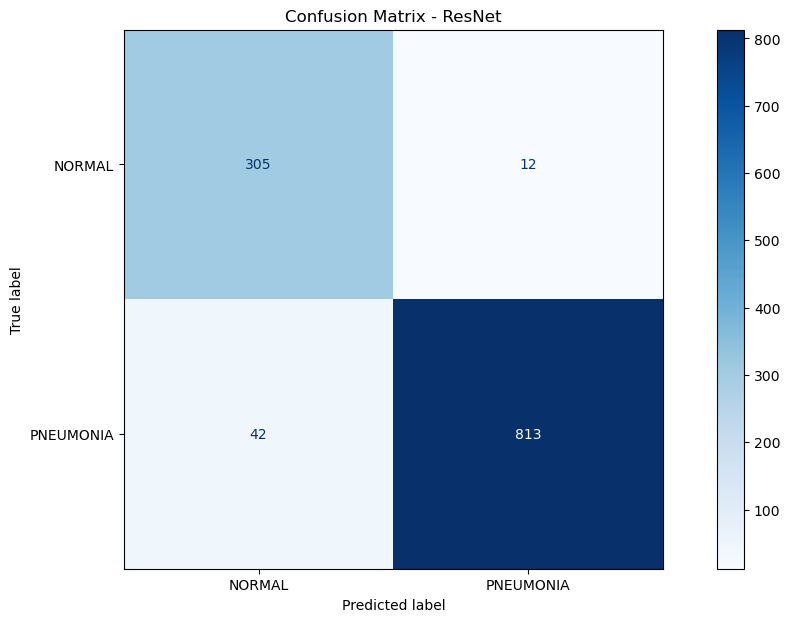

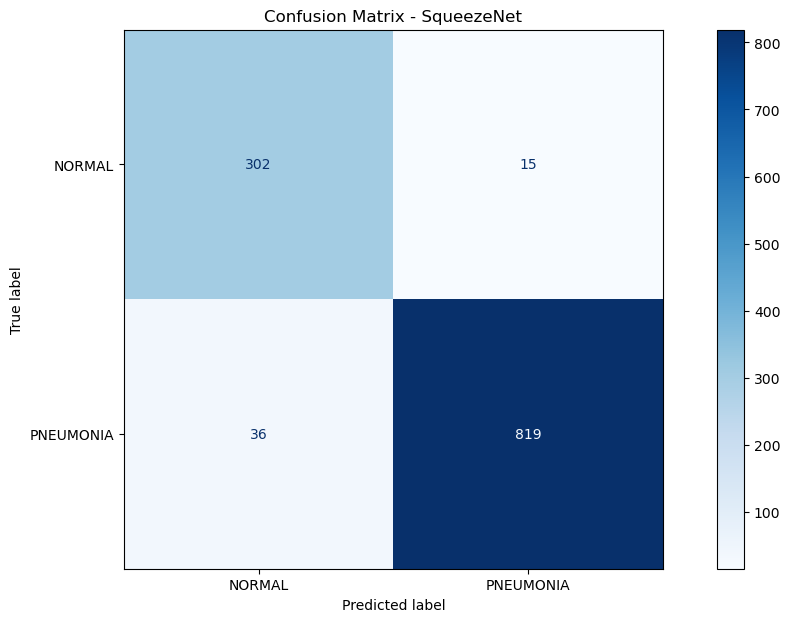

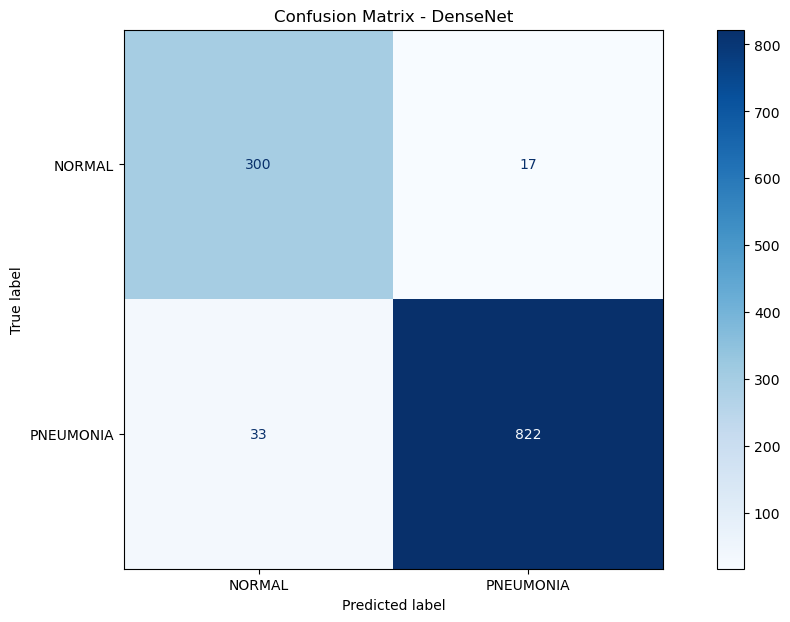

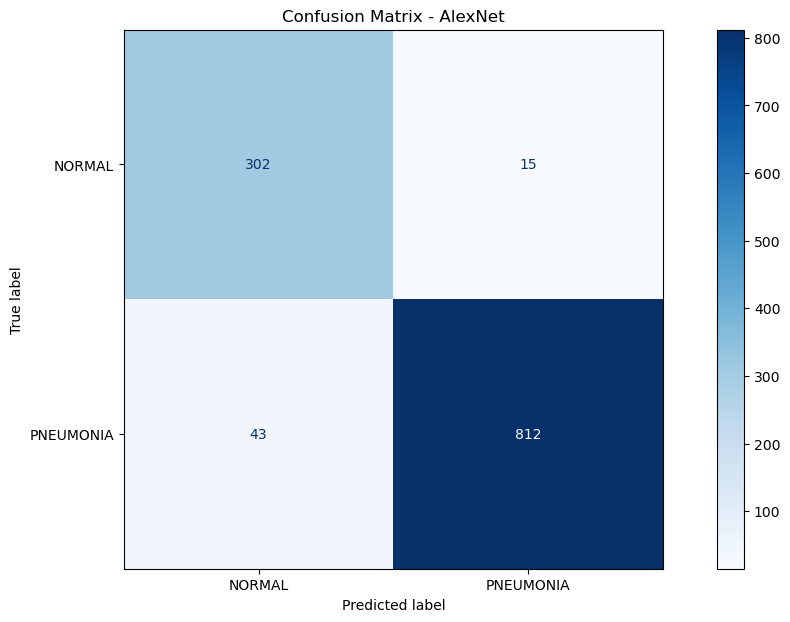

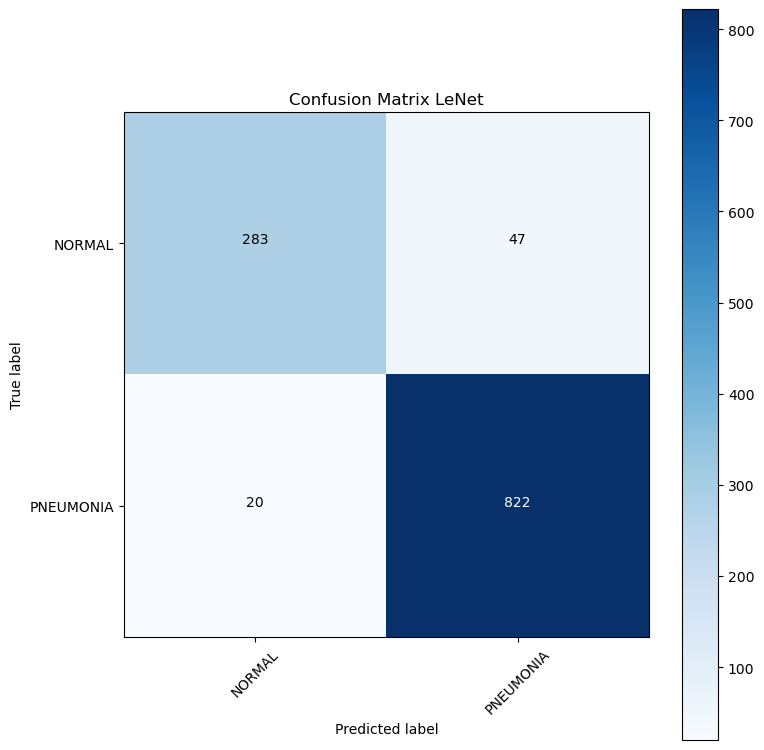

In [303]:
cm_resnet_test = confusion_matrix(y_true_test_resnet, y_pred_test_resnet)
disp_resnet_test = ConfusionMatrixDisplay(confusion_matrix=cm_resnet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14,7))
disp_resnet_test.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - ResNet')
plt.show()

cm_squeezenet_test = confusion_matrix(y_true_test_squeezenet, y_pred_test_squeezenet)
disp_squeezenet_test = ConfusionMatrixDisplay(confusion_matrix=cm_squeezenet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14,7))
disp_squeezenet_test.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SqueezeNet')
plt.show()

cm_densenet_test = confusion_matrix(y_true_test_densenet, y_pred_test_densenet)
disp_densenet_test = ConfusionMatrixDisplay(confusion_matrix=cm_densenet_test, display_labels=class_names_resnet)
fig, ax = plt.subplots(figsize=(14,7))
disp_densenet_test.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - DenseNet')
plt.show()



cm_alexnet = confusion_matrix(y_true_test_alexnet, y_pred_test_alexnet)
disp_alexnet = ConfusionMatrixDisplay(confusion_matrix=cm_alexnet, display_labels=class_names)
fig, ax = plt.subplots(figsize=(14,7))
disp_alexnet.plot(ax=ax, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - AlexNet')
plt.show()


plt.figure(figsize=(8,8))
plt.imshow(cm_lenet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix LeNet')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['NORMAL', 'PNEUMONIA'], rotation=45)
plt.yticks(tick_marks, ['NORMAL', 'PNEUMONIA'])

thresh = cm_lenet.max() / 2.
for i, j in np.ndindex(cm_lenet.shape):
    plt.text(j, i, format(cm_lenet[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_lenet[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()